In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data=data = pd.read_csv("incidents_datasets_KE.csv")
# data.head(10)


In [2]:
cols = data.columns
num_cols = data._get_numeric_data().columns

In [3]:
cat_cols=list(set(cols) - set(num_cols))
data_cat=data[cat_cols]
data_cat


,srcipcategory_dominate,categoryname,grandparent_category,dstipcategory_dominate,ip,client_code,alert_ids,weekday,ipcategory_scope,ipcategory_name
0,PRIV-192,Attack,A,INTERNET,YT.LB.32.21,DPM,Nhq,Tue,Internet,INTERNET
1,PRIV-192,Exploit,A,INTERNET,192.SL.UK.94,FIN,XZt,Thu,Private network,PRIV-192
2,PRIV-10,Attack,A,INTERNET,YT.LB.38.21,CHP,bBz,Tue,Internet,INTERNET
3,INTERNET,Attack,A,INTERNET,JX.NY.13.20,HPS,ZNr,Tue,Internet,INTERNET
4,PRIV-10,Attack,A,INTERNET,YT.LB.32.21,OSC,poV,Sat,Internet,INTERNET
5,INTERNET,Exploit,A,INTERNET,10.FM.RK.37,QWB,ZSX,Sat,Private network,PRIV-10
6,INTERNET,Exploit,A,PRIV-10,IJ.PI.86.150,IUO,TVd,Thu,Internet,INTERNET
7,PRIV-10,Attack,A,INTERNET,YT.LB.32.21,GNI,xAY,Fri,Internet,INTERNET
8,PRIV-192,Attack,A,INTERNET,EU.FS.44.4,TDM,suH,Mon,Internet,INTERNET
9,PRIV-10,Attack,A,INTERNET,YT.LB.38.21,GBU,JhL,Mon,Internet,INTERNET


In [4]:
data_cat.groupby(['categoryname']).count()

,srcipcategory_dominate,grandparent_category,dstipcategory_dominate,ip,client_code,alert_ids,weekday,ipcategory_scope,ipcategory_name
categoryname,,,,,,,,,
Attack,23500,23500,23500,23500,23500,23500,23500,23500,23500
Attack Preparation,463,463,463,463,463,463,463,463,463
Compromise,358,358,358,358,358,358,358,358,358
Control and Maintain,2729,2729,2729,2729,2729,2729,2729,2729,2729
Exploit,8734,8734,8734,8734,8734,8734,8734,8734,8734
Malicious Activity,120,120,120,120,120,120,120,120,120
Reconnaissance,2118,2118,2118,2118,2118,2118,2118,2118,2118
Suspicious Account Activity,1,1,1,1,1,1,1,1,1
Suspicious Network Activity,590,590,590,590,590,590,590,590,590


In [5]:
data_cat=data[cat_cols].apply(lambda x: pd.factorize(cat_cols)[0])

In [6]:
data_cat

,srcipcategory_dominate,categoryname,grandparent_category,dstipcategory_dominate,ip,client_code,alert_ids,weekday,ipcategory_scope,ipcategory_name
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5
6,6,6,6,6,6,6,6,6,6,6
7,7,7,7,7,7,7,7,7,7,7
8,8,8,8,8,8,8,8,8,8,8
9,9,9,9,9,9,9,9,9,9,9


In [7]:
data.update(data_cat)

In [8]:
data.head()

,alert_ids,client_code,notified,categoryname,ip,ipcategory_name,ipcategory_scope,parent_category,grandparent_category,overallseverity,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
0,0,0,0,0,0,0,0,7,0,3,...,4160,675,1,0,2,1,1,1,1,1
1,1,1,0,1,1,1,1,1,1,5,...,9,2,4,12,3,2,2,2,1,1
2,2,2,0,2,2,2,2,7,2,4,...,3788,628,1,0,2,2,1,2,2,1
3,3,3,0,3,3,3,3,7,3,4,...,565,96,0,0,2,2,2,2,2,2
4,4,4,0,4,4,4,4,7,4,4,...,2790,632,1,0,1,1,1,1,1,1


In [9]:
data.count()

alert_ids                   39427
client_code                 39427
notified                    39427
categoryname                39427
ip                          39427
ipcategory_name             39427
ipcategory_scope            39427
parent_category             39427
grandparent_category        39427
overallseverity             39427
timestamp_dist              39427
start_hour                  39427
start_minute                39427
start_second                39427
weekday                     39427
correlatedcount             39427
n1                           7132
n2                           7132
n3                           7132
n4                           7132
n5                           7132
n6                           7132
n7                           7132
n8                           7132
n9                           7132
n10                          7132
score                        7132
srcip_cd                    39427
dstip_cd                    39427
srcport_cd    

In [10]:
data.dtypes
data = data.convert_objects(convert_numeric=True)
data[cat_cols] = data[cat_cols].apply(lambda x: pd.to_numeric(x), axis=0)

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [11]:
data.dtypes

alert_ids                   float64
client_code                 float64
notified                      int64
categoryname                float64
ip                          float64
ipcategory_name             float64
ipcategory_scope            float64
parent_category               int64
grandparent_category        float64
overallseverity               int64
timestamp_dist                int64
start_hour                    int64
start_minute                  int64
start_second                  int64
weekday                     float64
correlatedcount               int64
n1                          float64
n2                          float64
n3                          float64
n4                          float64
n5                          float64
n6                          float64
n7                          float64
n8                          float64
n9                          float64
n10                         float64
score                       float64
srcip_cd                    

In [12]:
correlation=data.corr()
correlation.head(10)

,alert_ids,client_code,notified,categoryname,ip,ipcategory_name,ipcategory_scope,parent_category,grandparent_category,overallseverity,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
alert_ids,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.261116,1.000000,0.464207,...,-0.145499,-0.238844,-0.316799,-0.406181,-0.646362,-0.497468,-0.435194,-0.337350,-0.265908,-0.174078
client_code,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.261116,1.000000,0.464207,...,-0.145499,-0.238844,-0.316799,-0.406181,-0.646362,-0.497468,-0.435194,-0.337350,-0.265908,-0.174078
notified,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.135884,NaN,0.037445,...,-0.172057,-0.167667,0.019107,0.011394,0.066572,0.072898,0.061550,0.111659,0.099042,0.078229
categoryname,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.261116,1.000000,0.464207,...,-0.145499,-0.238844,-0.316799,-0.406181,-0.646362,-0.497468,-0.435194,-0.337350,-0.265908,-0.174078
ip,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.261116,1.000000,0.464207,...,-0.145499,-0.238844,-0.316799,-0.406181,-0.646362,-0.497468,-0.435194,-0.337350,-0.265908,-0.174078
ipcategory_name,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.261116,1.000000,0.464207,...,-0.145499,-0.238844,-0.316799,-0.406181,-0.646362,-0.497468,-0.435194,-0.337350,-0.265908,-0.174078
ipcategory_scope,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.261116,1.000000,0.464207,...,-0.145499,-0.238844,-0.316799,-0.406181,-0.646362,-0.497468,-0.435194,-0.337350,-0.265908,-0.174078
parent_category,0.261116,0.261116,-0.135884,0.261116,0.261116,0.261116,0.261116,1.000000,0.261116,0.046066,...,0.540022,0.523846,-0.063486,-0.016803,-0.258703,-0.216419,-0.131195,-0.321772,-0.247076,-0.140759
grandparent_category,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.261116,1.000000,0.464207,...,-0.145499,-0.238844,-0.316799,-0.406181,-0.646362,-0.497468,-0.435194,-0.337350,-0.265908,-0.174078
overallseverity,0.464207,0.464207,0.037445,0.464207,0.464207,0.464207,0.464207,0.046066,0.464207,1.000000,...,0.213742,0.214465,0.001983,0.011052,-0.101610,0.012194,0.066296,0.078665,0.073248,0.064647


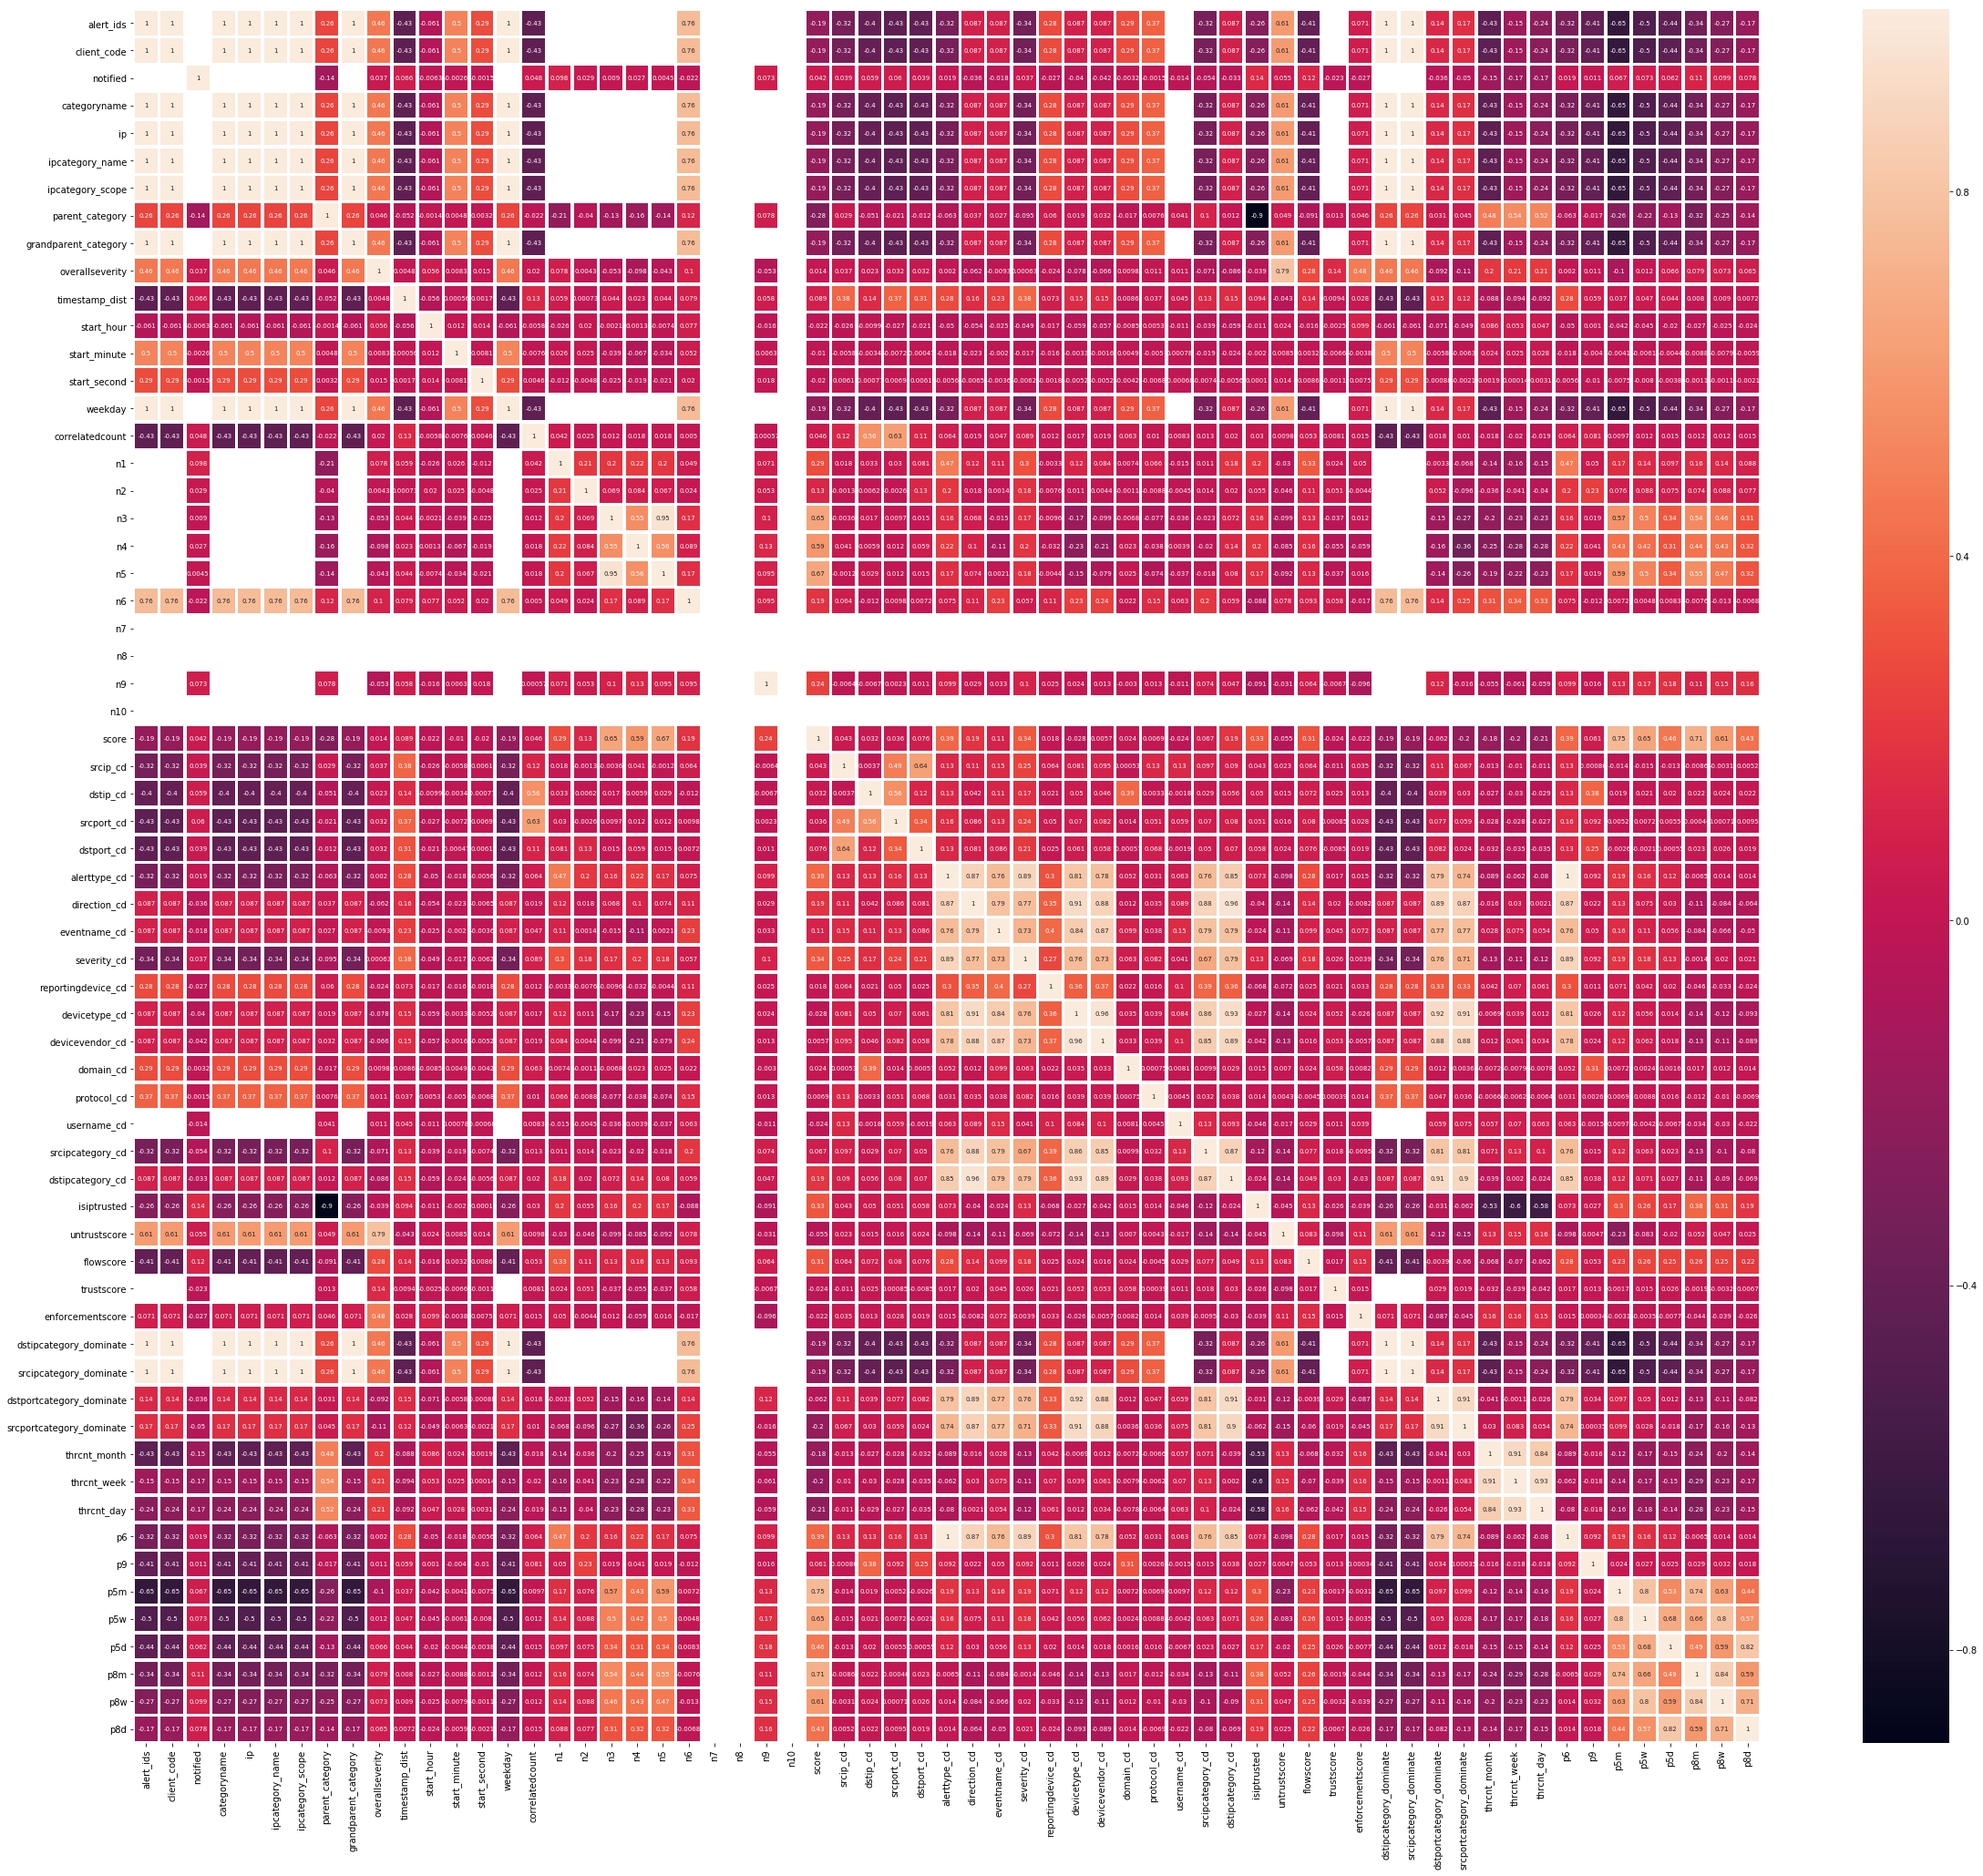

In [13]:
f,ax = plt.subplots(figsize=(40,35))
sns.heatmap(correlation,vmax=1,annot=True,annot_kws={'size':7},linewidth=2.5)

In [14]:
data = pd.read_csv("incidents_datasets_KE.csv")

In [15]:
data=data.iloc[:100, : 100]

In [16]:
data=data.T
data.head(10)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
alert_ids,Nhq,XZt,bBz,ZNr,poV,ZSX,TVd,xAY,suH,JhL,...,UBJ,Yvu,JYI,mQR,qjA,SmU,AGF,kxJ,VKN,lds
client_code,DPM,FIN,CHP,HPS,OSC,QWB,IUO,GNI,TDM,GBU,...,PRC,REQ,WBD,BKR,ZZE,LTN,GEP,TZS,ODR,OWD
notified,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
categoryname,Attack,Exploit,Attack,Attack,Attack,Exploit,Exploit,Attack,Attack,Attack,...,Attack,Attack,Attack,Attack,Attack,Attack,Exploit,Attack,Exploit,Exploit
ip,YT.LB.32.21,192.SL.UK.94,YT.LB.38.21,JX.NY.13.20,YT.LB.32.21,10.FM.RK.37,IJ.PI.86.150,YT.LB.32.21,EU.FS.44.4,YT.LB.38.21,...,YT.LB.36.21,MD.DO.154.86,10.CD.OO.77,YT.LB.36.21,10.QX.WJ.17,OQ.QJ.38.32,JQ.PJ.190.11,YT.LB.32.21,10.ZQ.RC.62,JM.OS.196.189
ipcategory_name,INTERNET,PRIV-192,INTERNET,INTERNET,INTERNET,PRIV-10,INTERNET,INTERNET,INTERNET,INTERNET,...,INTERNET,INTERNET,PRIV-10,INTERNET,PRIV-10,INTERNET,INTERNET,INTERNET,PRIV-10,INTERNET
ipcategory_scope,Internet,Private network,Internet,Internet,Internet,Private network,Internet,Internet,Internet,Internet,...,Internet,Internet,Private network,Internet,Private network,Internet,Internet,Internet,Private network,Internet
parent_category,7,1,7,7,7,1,7,7,7,7,...,7,7,1,7,1,7,7,7,1,7
grandparent_category,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
overallseverity,3,5,4,4,4,4,4,5,4,5,...,3,5,5,5,4,5,5,5,3,3


In [17]:
data['domain']='domain'

data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,domain
alert_ids,Nhq,XZt,bBz,ZNr,poV,ZSX,TVd,xAY,suH,JhL,...,Yvu,JYI,mQR,qjA,SmU,AGF,kxJ,VKN,lds,domain
client_code,DPM,FIN,CHP,HPS,OSC,QWB,IUO,GNI,TDM,GBU,...,REQ,WBD,BKR,ZZE,LTN,GEP,TZS,ODR,OWD,domain
notified,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,domain
categoryname,Attack,Exploit,Attack,Attack,Attack,Exploit,Exploit,Attack,Attack,Attack,...,Attack,Attack,Attack,Attack,Attack,Exploit,Attack,Exploit,Exploit,domain
ip,YT.LB.32.21,192.SL.UK.94,YT.LB.38.21,JX.NY.13.20,YT.LB.32.21,10.FM.RK.37,IJ.PI.86.150,YT.LB.32.21,EU.FS.44.4,YT.LB.38.21,...,MD.DO.154.86,10.CD.OO.77,YT.LB.36.21,10.QX.WJ.17,OQ.QJ.38.32,JQ.PJ.190.11,YT.LB.32.21,10.ZQ.RC.62,JM.OS.196.189,domain
ipcategory_name,INTERNET,PRIV-192,INTERNET,INTERNET,INTERNET,PRIV-10,INTERNET,INTERNET,INTERNET,INTERNET,...,INTERNET,PRIV-10,INTERNET,PRIV-10,INTERNET,INTERNET,INTERNET,PRIV-10,INTERNET,domain
ipcategory_scope,Internet,Private network,Internet,Internet,Internet,Private network,Internet,Internet,Internet,Internet,...,Internet,Private network,Internet,Private network,Internet,Internet,Internet,Private network,Internet,domain
parent_category,7,1,7,7,7,1,7,7,7,7,...,7,1,7,1,7,7,7,1,7,domain
grandparent_category,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,domain
overallseverity,3,5,4,4,4,4,4,5,4,5,...,5,5,5,4,5,5,5,3,3,domain


In [18]:
data.loc[['alert_ids','categoryname','client_code'],['domain']]='client_domain'
data.loc[['ip','ipcategory_name','ipcategory_scope','grandparent_category','weekday','dstipcategory_dominate','srcipcategory_dominate'],['domain']]='ip_domain'
data.loc[['thrcnt_week','thrcnt_month','thrcnt_day','parent_category','timestamp_dist','start_hour','start_minute','start_second'],['domain']]='time_domain'
data.loc[['overallseverity','enforcementscore','untrustscore','flowscore'],['domain']]='severity'
data.loc[['severity_cd','alerttype_cd','isiptrusted'],['domain']]='score'
data.loc[['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10'],['domain']]='n_domain'
data.loc[['p5m','p5w','p5d','p8m','p8w','p8d'],['domain']]='p_domain'

In [19]:
data.head(63)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,domain
alert_ids,Nhq,XZt,bBz,ZNr,poV,ZSX,TVd,xAY,suH,JhL,...,Yvu,JYI,mQR,qjA,SmU,AGF,kxJ,VKN,lds,client_domain
client_code,DPM,FIN,CHP,HPS,OSC,QWB,IUO,GNI,TDM,GBU,...,REQ,WBD,BKR,ZZE,LTN,GEP,TZS,ODR,OWD,client_domain
notified,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,domain
categoryname,Attack,Exploit,Attack,Attack,Attack,Exploit,Exploit,Attack,Attack,Attack,...,Attack,Attack,Attack,Attack,Attack,Exploit,Attack,Exploit,Exploit,client_domain
ip,YT.LB.32.21,192.SL.UK.94,YT.LB.38.21,JX.NY.13.20,YT.LB.32.21,10.FM.RK.37,IJ.PI.86.150,YT.LB.32.21,EU.FS.44.4,YT.LB.38.21,...,MD.DO.154.86,10.CD.OO.77,YT.LB.36.21,10.QX.WJ.17,OQ.QJ.38.32,JQ.PJ.190.11,YT.LB.32.21,10.ZQ.RC.62,JM.OS.196.189,ip_domain
ipcategory_name,INTERNET,PRIV-192,INTERNET,INTERNET,INTERNET,PRIV-10,INTERNET,INTERNET,INTERNET,INTERNET,...,INTERNET,PRIV-10,INTERNET,PRIV-10,INTERNET,INTERNET,INTERNET,PRIV-10,INTERNET,ip_domain
ipcategory_scope,Internet,Private network,Internet,Internet,Internet,Private network,Internet,Internet,Internet,Internet,...,Internet,Private network,Internet,Private network,Internet,Internet,Internet,Private network,Internet,ip_domain
parent_category,7,1,7,7,7,1,7,7,7,7,...,7,1,7,1,7,7,7,1,7,time_domain
grandparent_category,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,ip_domain
overallseverity,3,5,4,4,4,4,4,5,4,5,...,5,5,5,4,5,5,5,3,3,severity


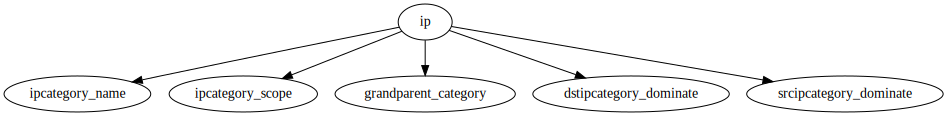

In [20]:
from graphviz import Digraph
dot = Digraph(comment='IP_Hierarchy')
dot.node('A', 'ip')
dot.node('B', 'ipcategory_name')
dot.node('C', 'ipcategory_scope')
dot.node('D', 'grandparent_category')
dot.node('E', 'dstipcategory_dominate')
dot.node('F','srcipcategory_dominate')
dot.edges(['AB', 'AC','AD','AE','AF'])
dot

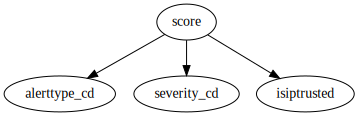

In [21]:
dot = Digraph(comment='Score_Hierarchy')
dot.node('A', 'score')
dot.node('B', 'alerttype_cd')
dot.node('C', 'severity_cd')
dot.node('D', 'isiptrusted')
dot.edges(['AB', 'AC','AD'])
dot


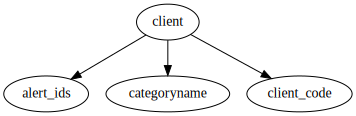

In [22]:
dot = Digraph(comment='Client_Hierarchy')
dot.node('A', 'client')
dot.node('B', 'alert_ids')
dot.node('C', 'categoryname')
dot.node('D', 'client_code')
dot.edges(['AB', 'AC','AD'])
dot

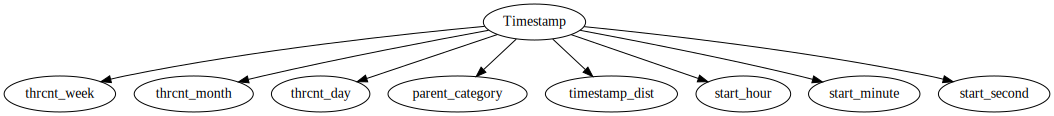

In [23]:
dot = Digraph(comment='Time_stamp_Hierarchy')
dot.node('A', 'Timestamp')
dot.node('B', 'thrcnt_week')
dot.node('C', 'thrcnt_month')
dot.node('D', 'thrcnt_day')
dot.node('E', 'parent_category')
dot.node('F', 'timestamp_dist')
dot.node('G', 'start_hour')
dot.node('H', 'start_minute')
dot.node('I', 'start_second')
dot.edges(['AB', 'AC','AD','AE','AF','AG','AH','AI'])
dot

radius: 3
diameter: 6
eccentricity: {'grandparent_category': 5, 'dstipcategory': 6, 'overallseverity': 6, 'ip': 4, 'alerts': 5, 'alerts_id': 6, 'clientcode': 6, 'srcipcategory': 6, 'ipcategory_scope': 4, 'ipcategory_name': 4, 'path': 5, 'categories': 3}
center: ['categories']
periphery: ['dstipcategory', 'overallseverity', 'alerts_id', 'clientcode', 'srcipcategory']
density: 0.166666666667


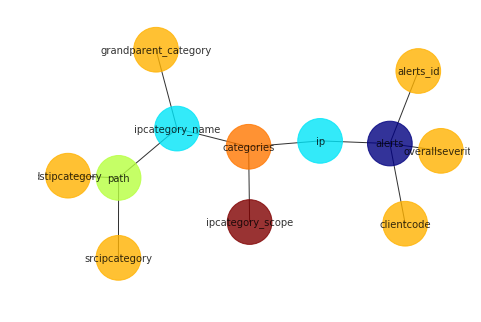

In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.Graph()
labels=G.add_edges_from(
    [('categories', 'ipcategory_scope'), ('categories', 'ip'), ('categories', 'ipcategory_name'), ('ip', 'alerts'), ('ipcategory_name', 'path'),
     ('ipcategory_name', 'grandparent_category'), ('path', 'dstipcategory'), ('path', 'srcipcategory'), ('alerts', 'overallseverity'),('alerts', 'clientcode'),('alerts', 'alerts_id')],weight=1)

val_map = {'ipcategory_scope': 1.0,
           'categories': 0.80543,
           'ip': 0.414285714285714,
           'path': 0.614285714285714,
           'ipcategory_name': 0.414285714285714,
           'alerts': 0.10}

pos = nx.spring_layout(G)
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
values = [val_map.get(node, 0.75) for node in G.nodes()]
print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, with_labels=True,cmap = plt.get_cmap('jet'),node_size=2000,font_size=10,node_color =values,alpha=0.80)
plt.axis('off')
pylab.show()



In [25]:
nx.average_degree_connectivity(G) # For a node of degree k - What is the average of its neighbours' degree?

{1: 3.4285714285714284, 2: 3.5, 3: 2.0, 4: 1.25}

In [26]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['alerts', 'alerts_id', 'clientcode', 'overallseverity'],
 ['categories', 'ip', 'ipcategory_scope'],
 ['dstipcategory',
  'grandparent_category',
  'ipcategory_name',
  'path',
  'srcipcategory']]

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data= pd.read_csv("incidents_datasets_KE.csv")
pd.set_option("display.max_columns",None)
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
data_cat=data[cat_cols]
data_cat['notified'] = data["notified"]
data_cat["overallseverity"] = data["overallseverity"]
data_cat.drop('dstipcategory_dominate', axis=1, inplace=True)
data_cat.drop('srcipcategory_dominate', axis=1, inplace=True)

data_cat.head(10)

data_cat.loc[(data_cat['categoryname'] == 'Reconnaissance') & (data_cat['weekday'].isin(
    ['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])) & (data_cat["ipcategory_scope"] == 'Internet') & 
             (data_cat["grandparent_category"] == 'A') & 
             (data_cat['notified'] == 1)] # Suspicious Network Activity, Reconnaissance, Suspicious Reputation 


/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

,categoryname,grandparent_category,ip,client_code,alert_ids,weekday,ipcategory_scope,ipcategory_name,notified,overallseverity
230,Reconnaissance,A,LW.JQ.8.221,YVZ,aQh,Fri,Internet,INTERNET,1,4
522,Reconnaissance,A,YT.LI.171.112,NMQ,FNg,Mon,Internet,INTERNET,1,5
712,Reconnaissance,A,VZ.PK.185.224,ZIB,qHL,Fri,Internet,INTERNET,1,5
965,Reconnaissance,A,YA.JQ.122.104,HIV,oAi,Wed,Internet,INTERNET,1,3
974,Reconnaissance,A,SO.QW.6.69,AYP,biO,Mon,Internet,INTERNET,1,5
1242,Reconnaissance,A,BI.BA.247.246,TRK,Plx,Thu,Internet,INTERNET,1,5
1485,Reconnaissance,A,SP.MP.141.104,VPH,yqj,Mon,Internet,INTERNET,1,4
1773,Reconnaissance,A,SF.RH.147.206,SVK,pos,Sat,Internet,INTERNET,1,5
2575,Reconnaissance,A,SR.TX.170.23,MCR,Kes,Tue,Internet,INTERNET,1,5
2899,Reconnaissance,A,NH.RD.66.18,YXP,xKd,Sat,Internet,INTERNET,1,5


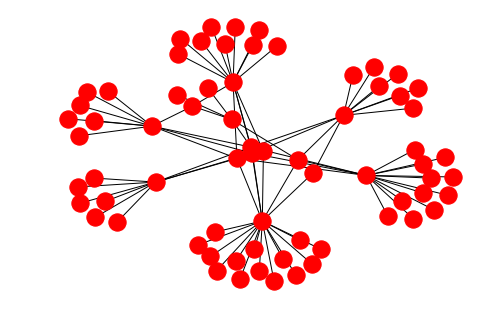

In [3]:

g = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='weekday') 

g=nx.draw(g)


In [4]:
ips = list(data_cat[0:100].ip.unique())
ips

['YT.LB.32.21',
 '192.SL.UK.94',
 'YT.LB.38.21',
 'JX.NY.13.20',
 '10.FM.RK.37',
 'IJ.PI.86.150',
 'EU.FS.44.4',
 'YT.LB.34.21',
 'VW.OS.0.20',
 'BG.YX.130.147',
 'JM.TR.58.2',
 '10.CN.CC.70',
 'DJ.TU.110.153',
 '10.FK.AX.24',
 '10.KW.JR.28',
 '10.MT.JH.21',
 'MC.ER.197.27',
 'BI.AL.26.27',
 '10.EI.PJ.221',
 '10.BW.NO.22',
 '10.OE.JK.181',
 '10.BW.BU.43',
 'OQ.QJ.38.32',
 'SP.OR.134.90',
 '10.YT.EF.102',
 '192.SL.GO.61',
 'KB.FI.252.230',
 'OQ.SF.198.19',
 '10.XU.ER.118',
 '172.BT.EB.7',
 'DT.DS.64.123',
 'EE.OS.51.30',
 '10.SB.PM.38',
 'YA.YT.192.102',
 '172.KM.CM.79',
 'EB.QD.27.77',
 'UC.ON.242.3',
 '10.BH.BV.28',
 '10.KW.HM.122',
 '10.HW.PF.1',
 'UN.BA.28.11',
 '10.BK.AX.11',
 '10.YK.ER.10',
 'XF.CB.202.1',
 'XI.TB.4.18',
 '10.UX.PM.11',
 'OW.NT.148.89',
 '172.BT.JN.13',
 'XX.AX.31.4',
 '10.XX.AX.94',
 'QP.IJ.202.50',
 '192.SL.IV.24',
 '10.UX.PM.55',
 'NZ.XJ.1.106',
 'YT.LB.36.10',
 'YT.LB.36.21',
 'MD.DO.154.86',
 '10.CD.OO.77',
 '10.QX.WJ.17',
 'JQ.PJ.190.11',
 '10.ZQ.RC.62',
 'J

In [5]:
alerts = list(data_cat[0:100].alert_ids.unique())
alerts

['Nhq',
 'XZt',
 'bBz',
 'ZNr',
 'poV',
 'ZSX',
 'TVd',
 'xAY',
 'suH',
 'JhL',
 'NDp',
 'XJP',
 'Qfn',
 'oPg',
 'DWh',
 'YTE',
 'cMn',
 'tcI',
 'TqU',
 'eOw',
 'LDz',
 'Tga',
 'tiD',
 'wTM',
 'zeG',
 'svk',
 'HLi',
 'vdy',
 'txe',
 'dpR',
 'beD',
 'ZZI',
 'axD',
 'wHR',
 'Ana',
 'bpk',
 'PlY',
 'BVI',
 'wAW',
 'oRV',
 'bNL',
 'vWx',
 'yZk',
 'CwD',
 'MiY',
 'raP',
 'inW',
 'Jwu',
 'BQy',
 'HBG',
 'Yyq',
 'jGb',
 'kyV',
 'PzN',
 'VOs',
 'YQd',
 'GdF',
 'oQT',
 'EIP',
 'Xrj',
 'xwl',
 'EBX',
 'YSz',
 'kKa',
 'bJj',
 'CbP',
 'HWI',
 'Bvw',
 'xtF',
 'qyR',
 'WfR',
 'xTy',
 'FWZ',
 'cvt',
 'aVr',
 'PjJ',
 'Nwc',
 'JAF',
 'Pzl',
 'cKj',
 'SPe',
 'wTH',
 'xlc',
 'TZL',
 'zdy',
 'nbu',
 'cXw',
 'qMf',
 'eGM',
 'NjI',
 'UBJ',
 'Yvu',
 'JYI',
 'mQR',
 'qjA',
 'SmU',
 'AGF',
 'kxJ',
 'VKN',
 'lds']

In [6]:
weekdays=list(data_cat[0:100].weekday.unique())
weekdays

['Tue', 'Thu', 'Sat', 'Fri', 'Mon', 'Wed', 'Sun']

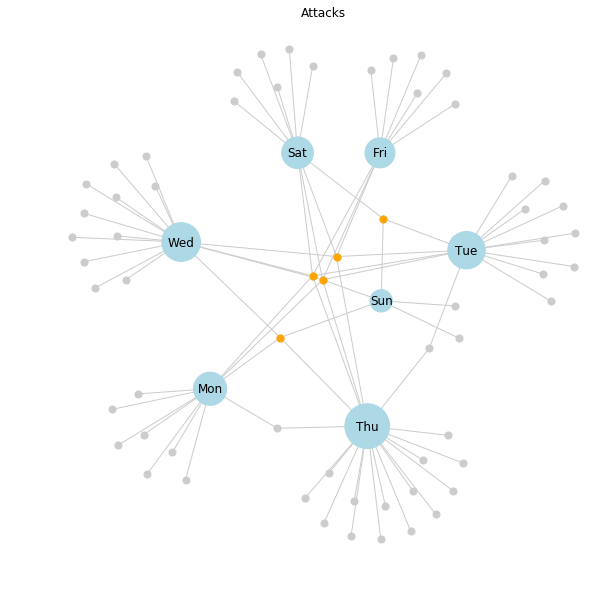

In [7]:
import matplotlib.pyplot as plt
import pylab
import pygraphviz
import networkx as nx
plt.figure(figsize=(10, 10))

# 1. Create the graph

g = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='weekday') 

layout = nx.spring_layout(g,seed=100)
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size


week_size = [g.degree(weekday) * 100 for weekday in weekdays]
nx.draw_networkx_nodes(g,
                       layout, 
                       with_labels=True, 
                       nodelist=weekdays, 
                       node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


# # Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=ips, node_color='#cccccc', node_size=50)
# nx.draw_networkx_nodes(g, layout, nodelist=alerts, node_color='#cccccc', node_size=50)

# Draw POPULAR IPS
popular_ips = [ip for ip in ips if g.degree(ip) > 2]

nx.draw_networkx_nodes(g, layout , nodelist=popular_ips, node_color='orange', node_size=50)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# node_labels_ip = dict(zip(popular_ips, popular_ips))
# nx.draw_networkx_labels(g, layout, labels=node_labels_ip)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it

plt.show()

In [8]:
alerts = list(data_cat[0:100].alert_ids.unique())
alerts

['Nhq',
 'XZt',
 'bBz',
 'ZNr',
 'poV',
 'ZSX',
 'TVd',
 'xAY',
 'suH',
 'JhL',
 'NDp',
 'XJP',
 'Qfn',
 'oPg',
 'DWh',
 'YTE',
 'cMn',
 'tcI',
 'TqU',
 'eOw',
 'LDz',
 'Tga',
 'tiD',
 'wTM',
 'zeG',
 'svk',
 'HLi',
 'vdy',
 'txe',
 'dpR',
 'beD',
 'ZZI',
 'axD',
 'wHR',
 'Ana',
 'bpk',
 'PlY',
 'BVI',
 'wAW',
 'oRV',
 'bNL',
 'vWx',
 'yZk',
 'CwD',
 'MiY',
 'raP',
 'inW',
 'Jwu',
 'BQy',
 'HBG',
 'Yyq',
 'jGb',
 'kyV',
 'PzN',
 'VOs',
 'YQd',
 'GdF',
 'oQT',
 'EIP',
 'Xrj',
 'xwl',
 'EBX',
 'YSz',
 'kKa',
 'bJj',
 'CbP',
 'HWI',
 'Bvw',
 'xtF',
 'qyR',
 'WfR',
 'xTy',
 'FWZ',
 'cvt',
 'aVr',
 'PjJ',
 'Nwc',
 'JAF',
 'Pzl',
 'cKj',
 'SPe',
 'wTH',
 'xlc',
 'TZL',
 'zdy',
 'nbu',
 'cXw',
 'qMf',
 'eGM',
 'NjI',
 'UBJ',
 'Yvu',
 'JYI',
 'mQR',
 'qjA',
 'SmU',
 'AGF',
 'kxJ',
 'VKN',
 'lds']

In [9]:
ip_cat_name= list(data_cat[0:100].ipcategory_name.unique())
ip_cat_name

['INTERNET', 'PRIV-192', 'PRIV-10', 'PRIV-172']

In [10]:
ips = list(data_cat[0:100].ip.unique())
ips

['YT.LB.32.21',
 '192.SL.UK.94',
 'YT.LB.38.21',
 'JX.NY.13.20',
 '10.FM.RK.37',
 'IJ.PI.86.150',
 'EU.FS.44.4',
 'YT.LB.34.21',
 'VW.OS.0.20',
 'BG.YX.130.147',
 'JM.TR.58.2',
 '10.CN.CC.70',
 'DJ.TU.110.153',
 '10.FK.AX.24',
 '10.KW.JR.28',
 '10.MT.JH.21',
 'MC.ER.197.27',
 'BI.AL.26.27',
 '10.EI.PJ.221',
 '10.BW.NO.22',
 '10.OE.JK.181',
 '10.BW.BU.43',
 'OQ.QJ.38.32',
 'SP.OR.134.90',
 '10.YT.EF.102',
 '192.SL.GO.61',
 'KB.FI.252.230',
 'OQ.SF.198.19',
 '10.XU.ER.118',
 '172.BT.EB.7',
 'DT.DS.64.123',
 'EE.OS.51.30',
 '10.SB.PM.38',
 'YA.YT.192.102',
 '172.KM.CM.79',
 'EB.QD.27.77',
 'UC.ON.242.3',
 '10.BH.BV.28',
 '10.KW.HM.122',
 '10.HW.PF.1',
 'UN.BA.28.11',
 '10.BK.AX.11',
 '10.YK.ER.10',
 'XF.CB.202.1',
 'XI.TB.4.18',
 '10.UX.PM.11',
 'OW.NT.148.89',
 '172.BT.JN.13',
 'XX.AX.31.4',
 '10.XX.AX.94',
 'QP.IJ.202.50',
 '192.SL.IV.24',
 '10.UX.PM.55',
 'NZ.XJ.1.106',
 'YT.LB.36.10',
 'YT.LB.36.21',
 'MD.DO.154.86',
 '10.CD.OO.77',
 '10.QX.WJ.17',
 'JQ.PJ.190.11',
 '10.ZQ.RC.62',
 'J

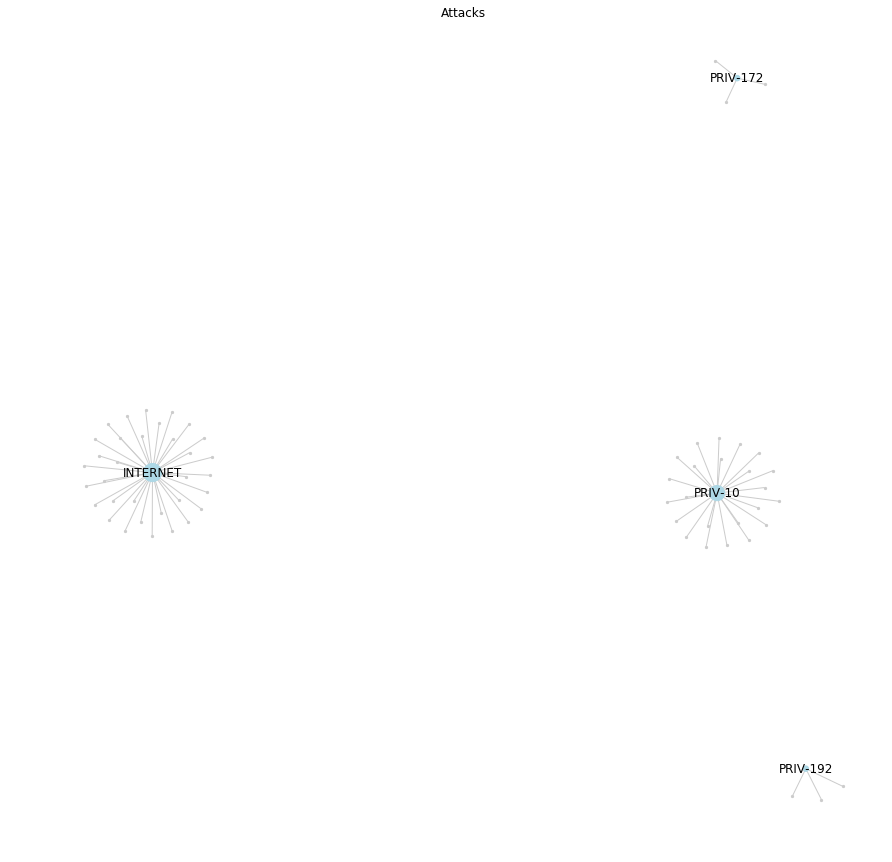

In [11]:


plt.figure(figsize=(15, 15))

# 1. Create the graph
g1 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='ipcategory_name') 

layout = nx.spring_layout(g1)
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size


ip_size = [g1.degree(name) * 10 for name in ip_cat_name]
nx.draw_networkx_nodes(g1,
                       layout, 
                       with_labels=True, 
                       nodelist=ip_cat_name, 
                       node_size=ip_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


# # Draw EVERYONE
nx.draw_networkx_nodes(g1, layout, nodelist=ips, node_color='#cccccc', node_size=5)
# nx.draw_networkx_nodes(g, layout, nodelist=alerts, node_color='#cccccc', node_size=50)

# Draw POPULAR IPS
popular_ips = [ip for ip in ips if g1.degree(ip) > 2]

nx.draw_networkx_nodes(g1, layout , nodelist=popular_ips, node_color='orange', node_size=100)

nx.draw_networkx_edges(g1, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(ip_cat_name,ip_cat_name))
nx.draw_networkx_labels(g1, layout, labels=node_labels)


# node_labels_ip = dict(zip(popular_ips, popular_ips))
# nx.draw_networkx_labels(g, layout, labels=node_labels_ip)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it
plt.show()



In [12]:
notify_cat=list(data_cat[0:100].notified.unique())
notify_cat

[0, 1]

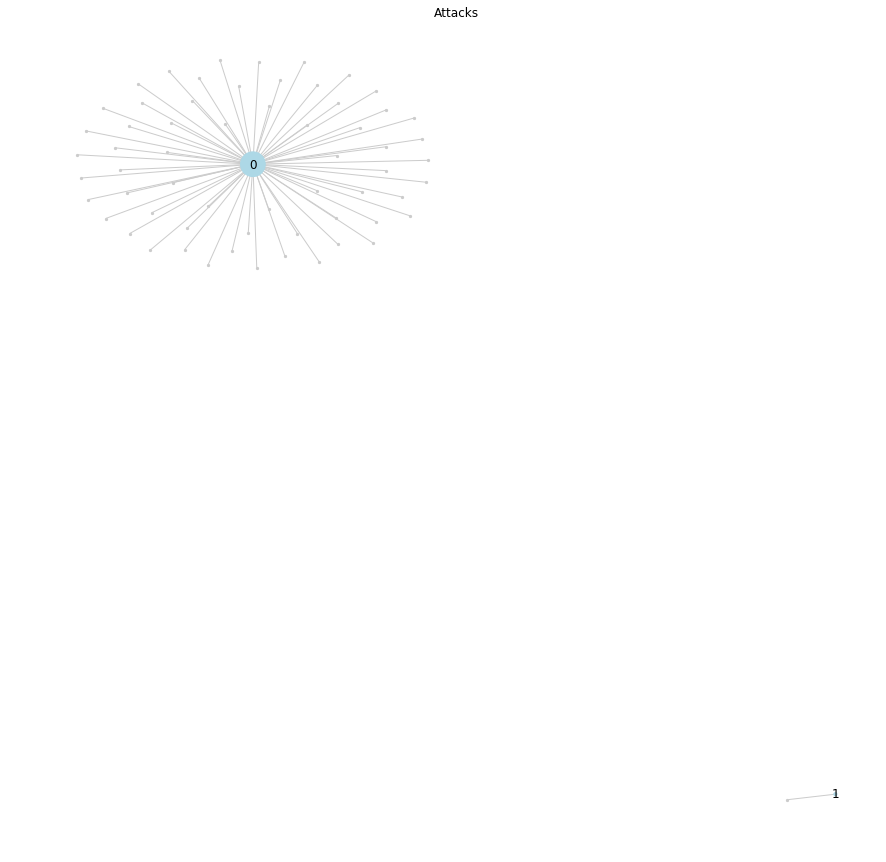

In [13]:
import matplotlib.pyplot as plt
import pylab
import graphviz

plt.figure(figsize=(15, 15))

# 1. Create the graph
g2 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='notified') 

layout = nx.spring_layout(g2)
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size


notify_size = [g2.degree(notify) * 10 for notify in notify_cat]
nx.draw_networkx_nodes(g2,
                       layout, 
                       with_labels=True, 
                       nodelist=notify_cat, 
                       node_size=notify_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


# # Draw EVERYONE
nx.draw_networkx_nodes(g2, layout, nodelist=ips, node_color='#cccccc', node_size=5)
# nx.draw_networkx_nodes(g, layout, nodelist=alerts, node_color='#cccccc', node_size=50)

# Draw POPULAR IPS
popular_ips = [ip for ip in ips if g2.degree(ip) > 2]

nx.draw_networkx_nodes(g2, layout , nodelist=popular_ips, node_color='orange', node_size=100)

nx.draw_networkx_edges(g2, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(notify_cat,notify_cat))
nx.draw_networkx_labels(g2, layout, labels=node_labels)


# node_labels_ip = dict(zip(popular_ips, popular_ips))
# nx.draw_networkx_labels(g, layout, labels=node_labels_ip)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it
plt.show()



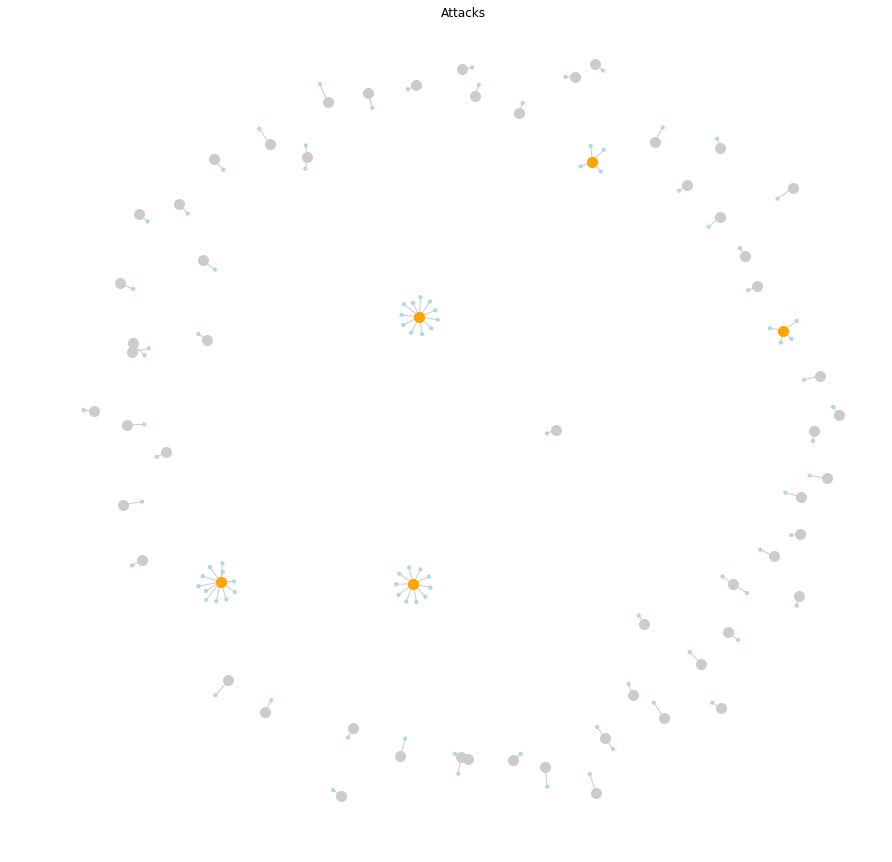

In [14]:
import matplotlib.pyplot as plt
import pylab
import graphviz

plt.figure(figsize=(15, 15))

# 1. Create the graph
g3 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='alert_ids') 

layout = nx.spring_layout(g3)
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size


alert_size = [g3.degree(alert) * 10 for alert in alerts]
nx.draw_networkx_nodes(g3,
                       layout, 
                       nodelist=alerts, 
                       node_size=alert_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


# # Draw EVERYONE
nx.draw_networkx_nodes(g3, layout, nodelist=ips, node_color='#cccccc', node_size=100)
# nx.draw_networkx_nodes(g, layout, nodelist=alerts, node_color='#cccccc', node_size=50)

# Draw POPULAR IPS
popular_ip = [ip for ip in ips if g3.degree(ip) > 3]

nx.draw_networkx_nodes(g3, layout , nodelist=popular_ip, node_color='orange', node_size=100)

nx.draw_networkx_edges(g3, layout, width=1, edge_color="#cccccc")

# node_labels = dict(zip(alerts,alerts))
# nx.draw_networkx_labels(g3, layout, labels=node_labels)


# node_labels_ip = dict(zip(popular_ips, popular_ips))
# nx.draw_networkx_labels(g, layout, labels=node_labels_ip)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it
plt.show()



In [15]:
severity=list(data_cat[0:100].overallseverity.unique())

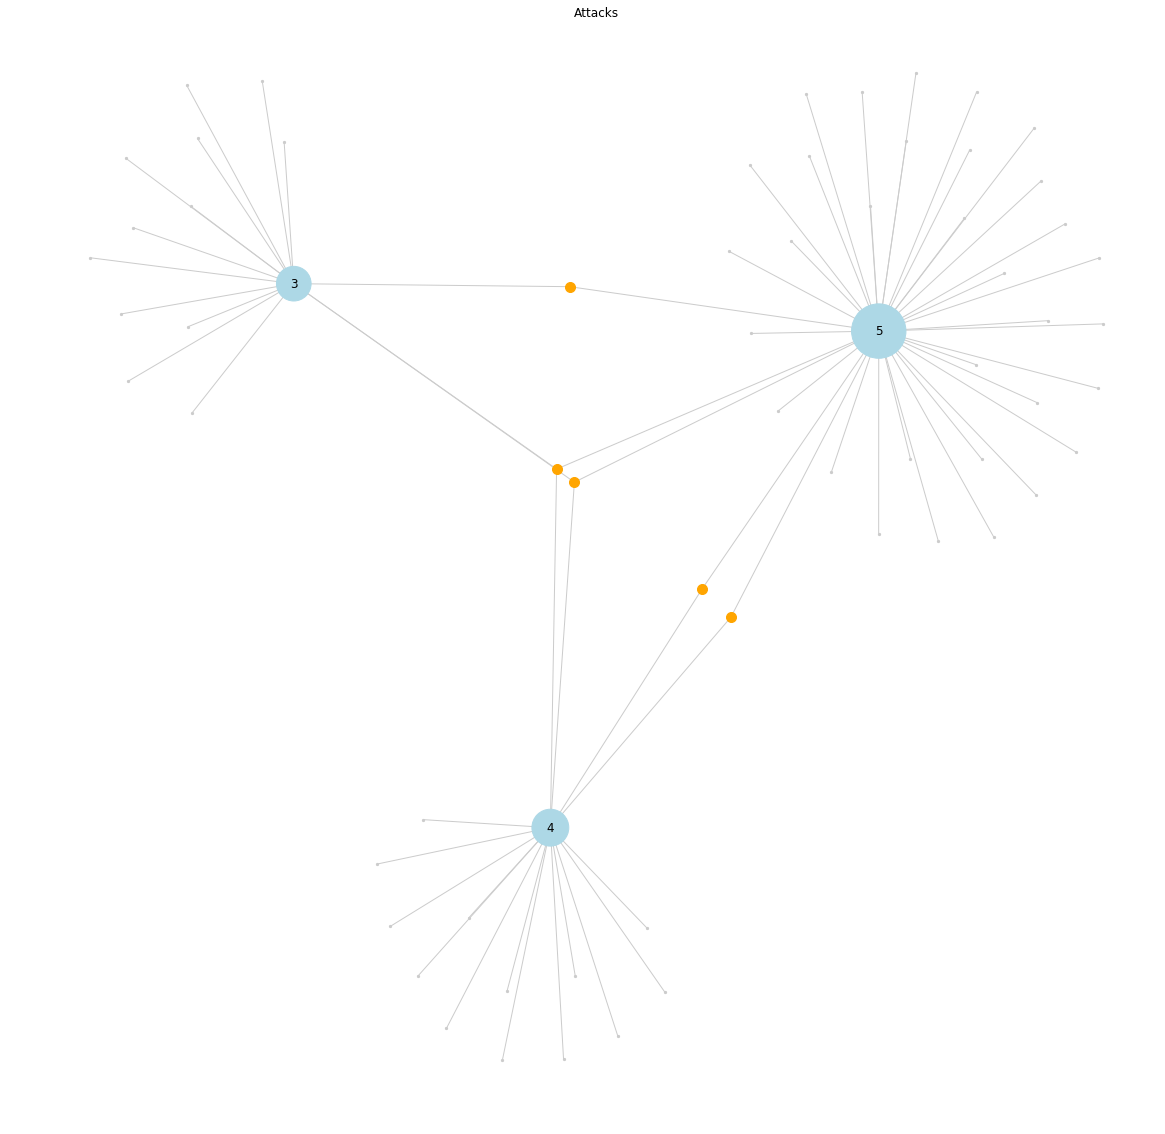

In [16]:
import matplotlib.pyplot as plt
import pylab
import graphviz

plt.figure(figsize=(20, 20))

# 1. Create the graph
g4 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='overallseverity') 

layout = nx.spring_layout(g4)
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size


sever_size = [g4.degree(sever) * 80 for sever in severity]
nx.draw_networkx_nodes(g4,
                       layout, 
                       nodelist=severity, 
                       node_size=sever_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


# # Draw EVERYONE
nx.draw_networkx_nodes(g4, layout, nodelist=ips, node_color='#cccccc', node_size=5)
# nx.draw_networkx_nodes(g, layout, nodelist=alerts, node_color='#cccccc', node_size=50)

# Draw POPULAR IPS
popular_ip = [ip for ip in ips if g4.degree(ip) > 1]

nx.draw_networkx_nodes(g4, layout , nodelist=popular_ip, node_color='orange', node_size=100)

nx.draw_networkx_edges(g4, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(severity,severity))
nx.draw_networkx_labels(g4, layout, labels=node_labels)


# node_labels_ip = dict(zip(popular_ips, popular_ips))
# nx.draw_networkx_labels(g, layout, labels=node_labels_ip)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it
plt.show()



Properties of Graph
radius: 3
diameter: 6
eccentricity: {0: 4, 1: 6, '10.UX.PM.55': 3, 'Wed': 4, 'OW.NT.148.89': 5, 'Sun': 4, '10.FK.AX.24': 3, '10.KW.JR.28': 3, 'KB.FI.252.230': 5, 'XF.CB.202.1': 5, '10.SB.PM.38': 3, 'XI.TB.4.18': 5, 'BG.YX.130.147': 5, '192.SL.GO.61': 5, '10.OE.JK.181': 3, '10.YT.EF.102': 3, 'OQ.QJ.38.32': 5, 'EU.FS.44.4': 5, '10.MT.JH.21': 3, 'MD.DO.154.86': 5, '192.SL.UK.94': 5, 'BI.AL.26.27': 5, 'DJ.TU.110.153': 5, 'XX.AX.31.4': 5, 'JX.NY.13.20': 5, 'OQ.SF.198.19': 5, 'YT.LB.36.21': 5, '10.BW.NO.22': 3, 'MC.ER.197.27': 5, 'Mon': 4, '10.XX.AX.94': 3, 'YA.YT.192.102': 5, '10.CN.CC.70': 3, '172.KM.CM.79': 5, 'Fri': 4, 'JQ.PJ.190.11': 5, 'YT.LB.38.21': 3, 'VW.OS.0.20': 5, 'JM.OS.196.189': 5, 'SP.OR.134.90': 5, 'Thu': 4, 'IJ.PI.86.150': 5, 'YT.LB.32.21': 3, '10.BK.AX.11': 3, '10.UX.PM.11': 3, 'EE.OS.51.30': 5, '10.XU.ER.118': 3, 'PRIV-172': 6, '172.BT.EB.7': 5, '192.SL.IV.24': 5, '10.QX.WJ.17': 3, 'PRIV-192': 6, '10.HW.PF.1': 3, '10.ZQ.RC.62': 5, '10.CD.OO.77': 3, 'UC.

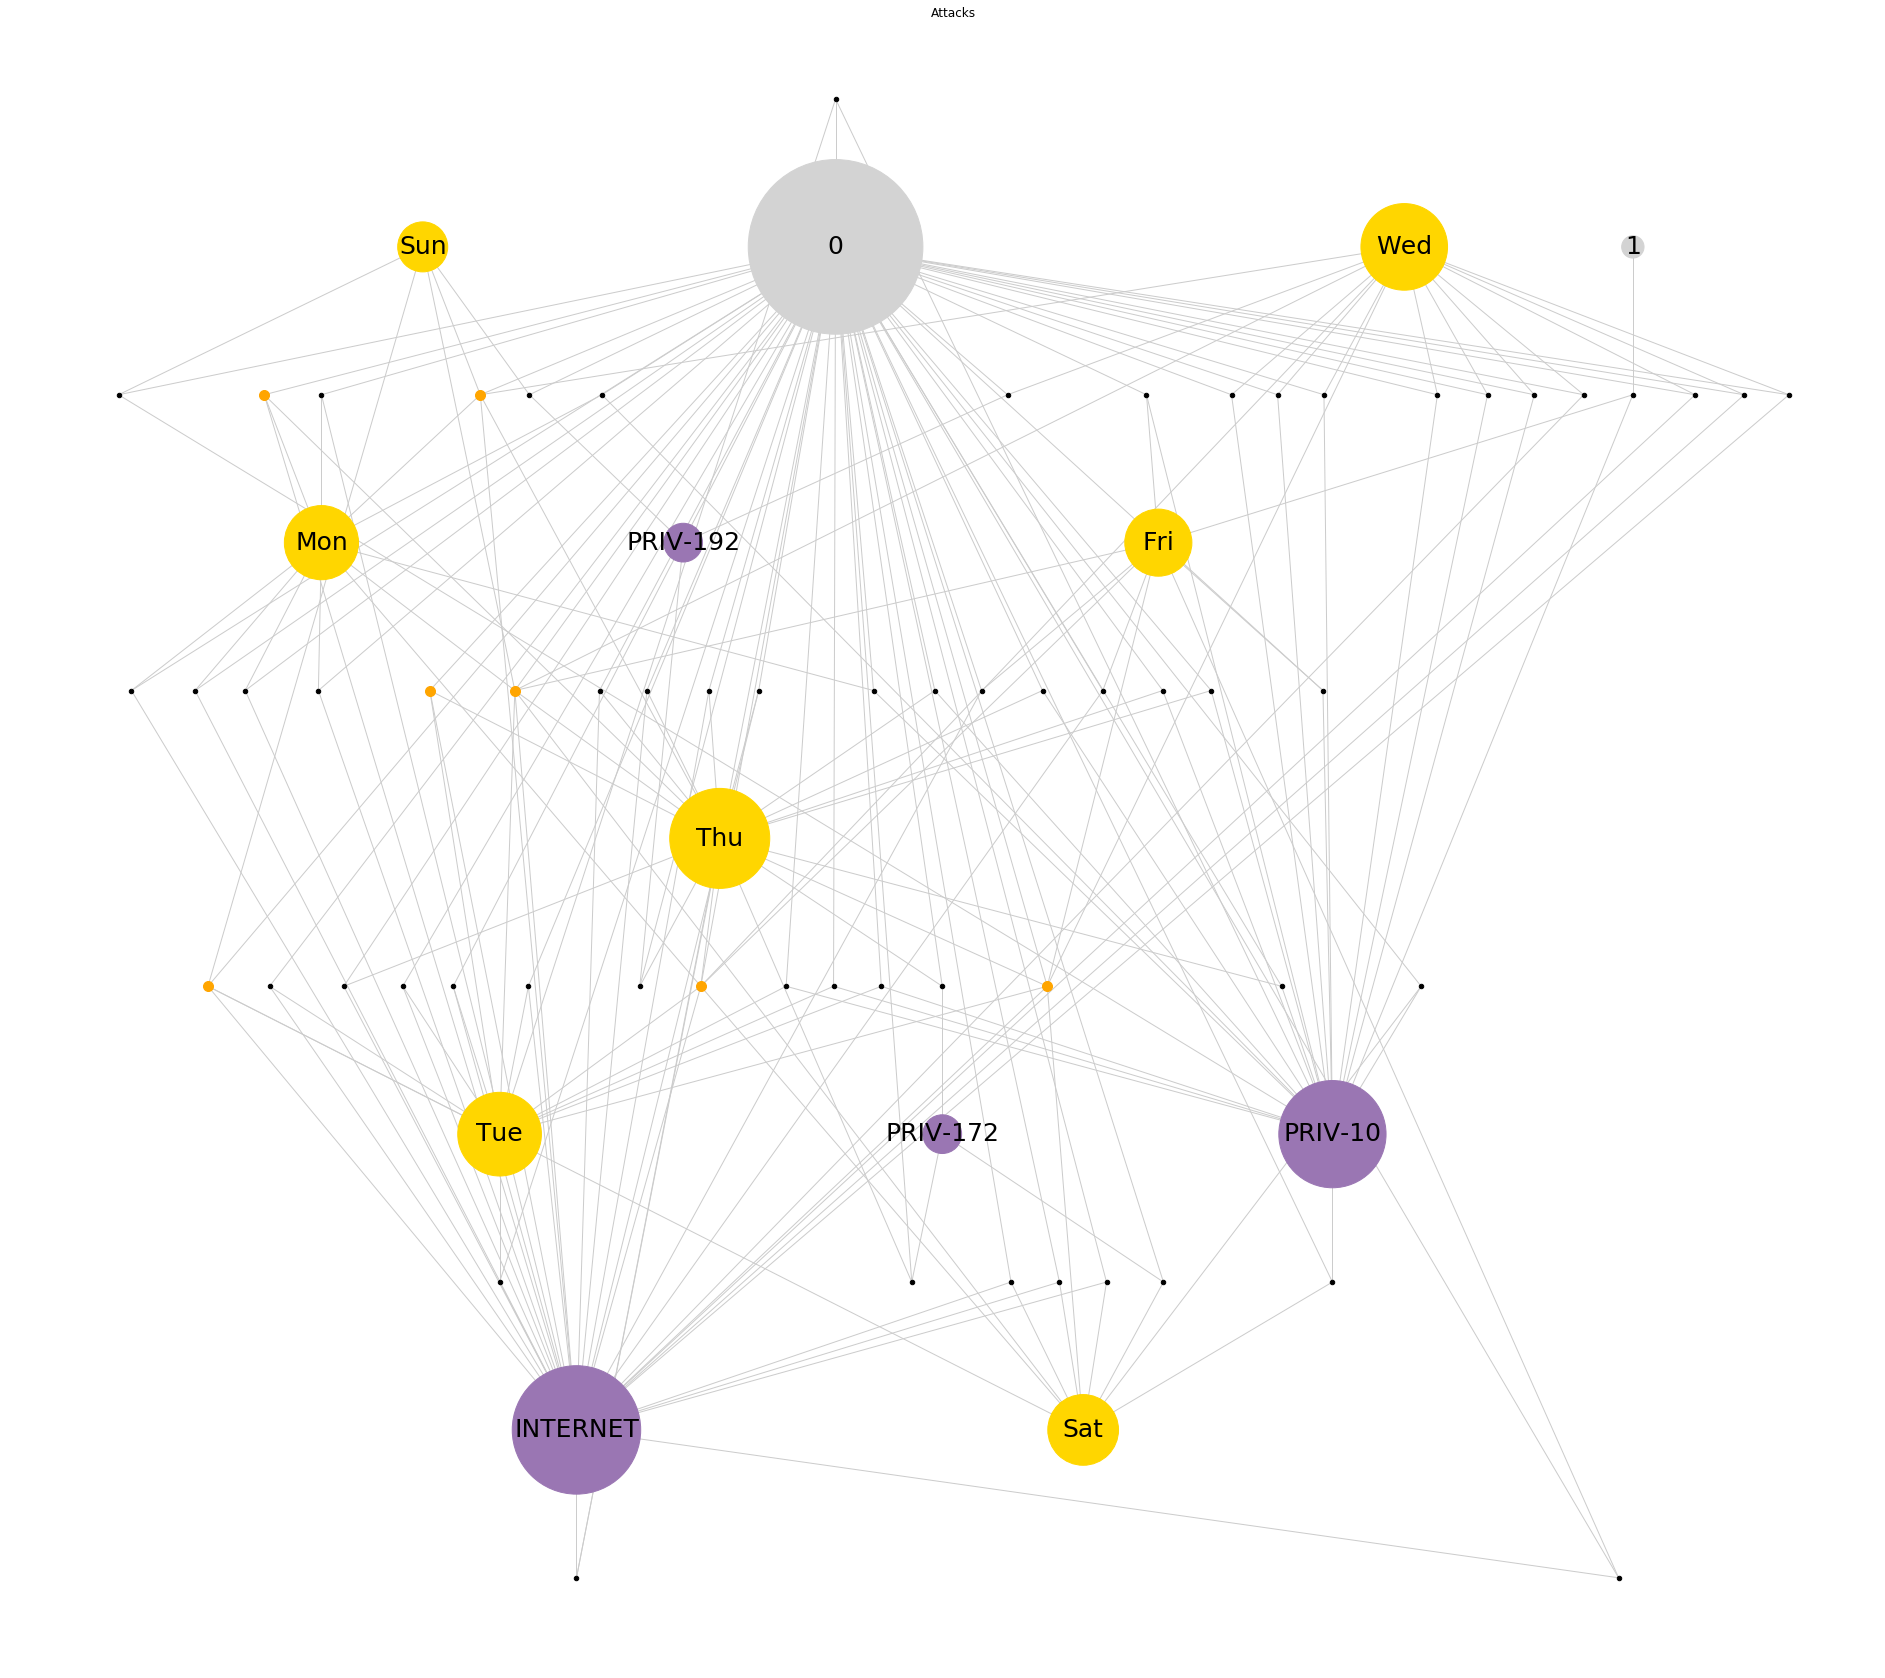

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(33, 30))

F= nx.compose(g,g1)

G=nx.compose(F,g2)

layout = nx.nx_agraph.pygraphviz_layout(G, prog='dot')
ip_size = [G.degree(name) * 500 for name in ip_cat_name]
notify_size = [G.degree(notify) * 500 for notify in notify_cat]
nx.draw_networkx_nodes(G,
                       layout, 
                       with_labels=True, 
                       nodelist=notify_cat, 
                       node_size=notify_size, # a LIST of sizes, based on g.degree
                       node_color='lightgrey')
nx.draw_networkx_nodes(G,
                       layout, 
                       with_labels=True, 
                       nodelist=ip_cat_name, 
                       node_size=ip_size, # a LIST of sizes, based on g.degree
                       node_color='#9A76B3')
week_size = [G.degree(weekday) * 500 for weekday in weekdays]
nx.draw_networkx_nodes(G,
                       layout, 
                       with_labels=True, 
                       nodelist=weekdays, 
                       node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

# # Draw EVERYONE
nx.draw_networkx_nodes(G, layout, nodelist=ips, node_color='black', node_size=20)


# Draw POPULAR IPS
popular_ips = [ip for ip in ips if G.degree(ip) > 3]

nx.draw_networkx_nodes(G, layout , nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(G, layout,nodelist=ips, width=1, edge_color="#cccccc")

node_labels = dict(zip(ip_cat_name,ip_cat_name))
nx.draw_networkx_labels(G, layout, labels=node_labels,font_size=25)

node_labels_week= dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(G, layout, labels=node_labels_week,font_size=25)
# 4. Turn off the axis because I know you don't want it
node_labels_notify= dict(zip(notify_cat,notify_cat))
nx.draw_networkx_labels(G, layout, labels=node_labels_notify,font_size=25)

plt.axis('off')

plt.title("Attacks")
print("Properties of Graph")
print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))
# 5. Tell matplotlib to show it
plt.show()


In [22]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[0,
  '10.BH.BV.28',
  '10.BK.AX.11',
  '10.BW.BU.43',
  '10.BW.NO.22',
  '10.CD.OO.77',
  '10.CN.CC.70',
  '10.EI.PJ.221',
  '10.FK.AX.24',
  '10.FM.RK.37',
  '10.HW.PF.1',
  '10.KW.HM.122',
  '10.KW.JR.28',
  '10.MT.JH.21',
  '10.OE.JK.181',
  '10.QX.WJ.17',
  '10.SB.PM.38',
  '10.UX.PM.11',
  '10.UX.PM.55',
  '10.XU.ER.118',
  '10.XX.AX.94',
  '10.YK.ER.10',
  '10.YT.EF.102',
  '172.BT.EB.7',
  '172.BT.JN.13',
  '172.KM.CM.79',
  'BG.YX.130.147',
  'BI.AL.26.27',
  'DJ.TU.110.153',
  'DT.DS.64.123',
  'EB.QD.27.77',
  'EE.OS.51.30',
  'EU.FS.44.4',
  'Fri',
  'IJ.PI.86.150',
  'INTERNET',
  'JM.OS.196.189',
  'JM.TR.58.2',
  'JQ.PJ.190.11',
  'JX.NY.13.20',
  'KB.FI.252.230',
  'MC.ER.197.27',
  'MD.DO.154.86',
  'Mon',
  'NZ.XJ.1.106',
  'OQ.QJ.38.32',
  'OQ.SF.198.19',
  'OW.NT.148.89',
  'PRIV-10',
  'PRIV-172',
  'QP.IJ.202.50',
  'SP.OR.134.90',
  'Sat',
  'Sun',
  'Thu',
  'Tue',
  'UC.ON.242.3',
  'UN.BA.28.11',
  'VW.OS.0.20',
  'Wed',
  'XF.CB.202.1',
  'XI.TB.4.18',
  'XX